In [67]:
import pandas as pd

df = pd.read_excel("Book1.xlsx")
df.head()

,Issuer Name,Amt Issued,Issue Date,Yld to Mty (Ask),Yld to Mty (Bid),Yld to Mty (Mid),Maturity,S&P Outlook,S&P Rating,Currency,Yield at Issue,LQA Bid-Ask Spread,Market Cap,Volume,Avg Vol 30D,Avg Vol 5D,LQA Expected Daily Vol
0,UBS Group AG,1.636152e+09,11/13/2023,8.547007,8.603611,8.575216,#N/A Field Not Applicable,NEG,BB,USD,NaN,0.291867,8.516736e+10,#N/A Field Not Applicable,NaN,NaN,4.118754e+06
1,UBS Group AG,1.636152e+09,11/13/2023,8.530456,8.530456,8.530456,#N/A Field Not Applicable,NEG,BB,USD,4.492,0.298033,8.516736e+10,3500,NaN,1460.0,4.375580e+06
2,Credit Agricole SA,1.250000e+09,11/27/2023,3.975343,4.010123,3.992718,11/27/2033,STABLE,A-,EUR,4.429,0.053609,3.699918e+10,#N/A Field Not Applicable,NaN,NaN,9.976294e+05
3,Intesa Sanpaolo SpA,1.750000e+09,11/16/2023,4.670643,4.706842,4.688739,11/16/2025,STABLE,BBB,EUR,NaN,0.018107,4.913502e+10,#N/A Field Not Applicable,NaN,NaN,6.054987e+06
4,Intesa Sanpaolo SpA,1.365256e+09,11/28/2023,6.900918,6.939746,6.920315,11/28/2033,STABLE,BBB,USD,7.214,0.079522,4.913502e+10,#N/A Field Not Applicable,NaN,NaN,3.386611e+06


In [68]:
df = df.loc[:, ["Issuer Name", "LQA Bid-Ask Spread", "Market Cap", "Yld to Mty (Ask)", "LQA Expected Daily Vol"]]

df_cleaned = df.dropna()
df_cleaned

,Issuer Name,LQA Bid-Ask Spread,Market Cap,Yld to Mty (Ask),LQA Expected Daily Vol
0,UBS Group AG,0.291867,8.516736e+10,8.547007,4.118754e+06
1,UBS Group AG,0.298033,8.516736e+10,8.530456,4.375580e+06
2,Credit Agricole SA,0.053609,3.699918e+10,3.975343,9.976294e+05
3,Intesa Sanpaolo SpA,0.018107,4.913502e+10,4.670643,6.054987e+06
4,Intesa Sanpaolo SpA,0.079522,4.913502e+10,6.900918,3.386611e+06
...,...,...,...,...,...
1141,Intel Corp,0.219404,1.822788e+11,5.432597,1.662158e+05
1142,Deutsche Bank AG,0.277910,2.350768e+10,3.840379,1.387842e+07
1144,Deutsche Bank AG,0.183528,2.349952e+10,3.415394,2.443217e+06
1147,Credit Agricole SA,0.169088,3.699918e+10,0.528,7.752510e+09


In [69]:
df_cleaned = df_cleaned[df["Market Cap"] != "#N/A Field Not Applicable"]
df_cleaned = df_cleaned[df["Yld to Mty (Ask)"] != "#N/A Field Not Applicable"]
df_cleaned = df_cleaned[df["LQA Expected Daily Vol"] != "#N/A Field Not Applicable"]
rating_mapping = {'NEG': -1, 'POS': 1, 'STABLE': 0}
# df_cleaned['S&P Outlook'] = df_cleaned['S&P Outlook'].map(rating_mapping)
df_cleaned

C:\Users\Ayushee\AppData\Local\Temp\ipykernel_24628\4267253540.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[df["Market Cap"] != "#N/A Field Not Applicable"]
C:\Users\Ayushee\AppData\Local\Temp\ipykernel_24628\4267253540.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[df["Yld to Mty (Ask)"] != "#N/A Field Not Applicable"]
C:\Users\Ayushee\AppData\Local\Temp\ipykernel_24628\4267253540.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[df["LQA Expected Daily Vol"] != "#N/A Field Not Applicable"]


,Issuer Name,LQA Bid-Ask Spread,Market Cap,Yld to Mty (Ask),LQA Expected Daily Vol
0,UBS Group AG,0.291867,8.516736e+10,8.547007,4.118754e+06
1,UBS Group AG,0.298033,8.516736e+10,8.530456,4.375580e+06
2,Credit Agricole SA,0.053609,3.699918e+10,3.975343,9.976294e+05
3,Intesa Sanpaolo SpA,0.018107,4.913502e+10,4.670643,6.054987e+06
4,Intesa Sanpaolo SpA,0.079522,4.913502e+10,6.900918,3.386611e+06
...,...,...,...,...,...
1141,Intel Corp,0.219404,1.822788e+11,5.432597,1.662158e+05
1142,Deutsche Bank AG,0.277910,2.350768e+10,3.840379,1.387842e+07
1144,Deutsche Bank AG,0.183528,2.349952e+10,3.415394,2.443217e+06
1147,Credit Agricole SA,0.169088,3.699918e+10,0.528,7.752510e+09


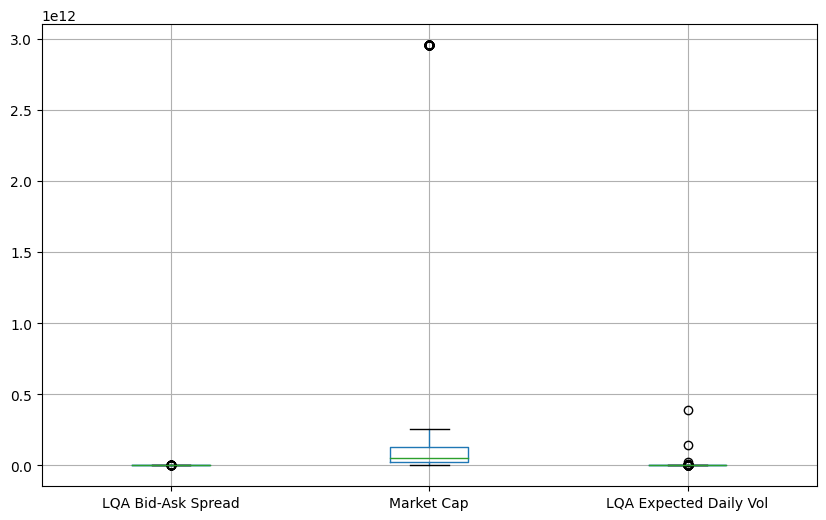

In [70]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
df_cleaned.boxplot()
plt.show()

In [71]:
# import numpy as np
# df_cleaned["LQA Bid-Ask Spread"] = np.log(df_cleaned["LQA Bid-Ask Spread"])

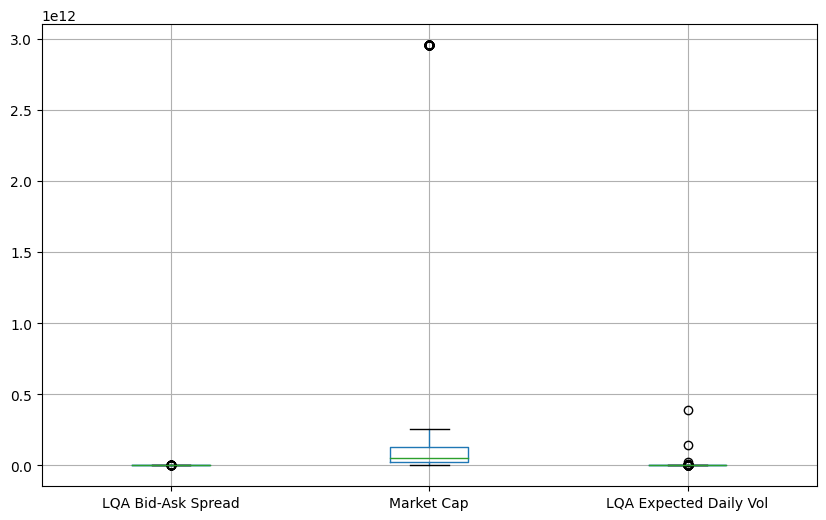

In [72]:
plt.figure(figsize=(10, 6))
df_cleaned.boxplot()
plt.show()

In [73]:
df_cleaned = df_cleaned[df_cleaned["Market Cap"] != df_cleaned["Market Cap"].max()]

In [74]:
df_cleaned = df_cleaned[df_cleaned["LQA Bid-Ask Spread"] != df_cleaned["LQA Bid-Ask Spread"].max()]
df_cleaned = df_cleaned[df_cleaned["LQA Bid-Ask Spread"] != df_cleaned["LQA Bid-Ask Spread"].min()]

In [75]:
from sklearn.discriminant_analysis import StandardScaler
scaler = StandardScaler()

final_df = df_cleaned.loc[:, ["LQA Bid-Ask Spread", "Market Cap", "Yld to Mty (Ask)", "LQA Expected Daily Vol"]]
X = scaler.fit_transform(final_df)
X

array([[ 0.19853667, -0.26467144,  0.17395233, -0.04657742],
       [ 0.2263779 , -0.26467144,  0.17276945, -0.04655879],
       [-0.87735159, -0.32835643, -0.15277928, -0.04680385],
       ...,
       [-0.29068371, -0.34620486, -0.1927982 , -0.04669897],
       [-0.35588962, -0.32835643, -0.39915693,  0.5155372 ],
       [ 0.20028321, -0.37626372, -0.12899691, -0.0225007 ]])

In [76]:
from sklearn.cluster import KMeans

n_clusters = 3

kmeans = KMeans(n_clusters = n_clusters)
final_df["Cluster"] = kmeans.fit_predict(X)
final_df["Cluster"] = final_df["Cluster"].astype("category")
final_df["Issuer Name"] = df_cleaned["Issuer Name"]
# final_df.to_csv("ex2.csv")
final_df.head()

c:\Users\Ayushee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,LQA Bid-Ask Spread,Market Cap,Yld to Mty (Ask),LQA Expected Daily Vol,Cluster,Issuer Name
0,0.291867,8.516736e+10,8.547007,4.118754e+06,1,UBS Group AG
1,0.298033,8.516736e+10,8.530456,4.375580e+06,1,UBS Group AG
2,0.053609,3.699918e+10,3.975343,9.976294e+05,1,Credit Agricole SA
3,0.018107,4.913502e+10,4.670643,6.054987e+06,1,Intesa Sanpaolo SpA
4,0.079522,4.913502e+10,6.900918,3.386611e+06,1,Intesa Sanpaolo SpA


<Axes: xlabel='LQA Bid-Ask Spread', ylabel='Market Cap'>

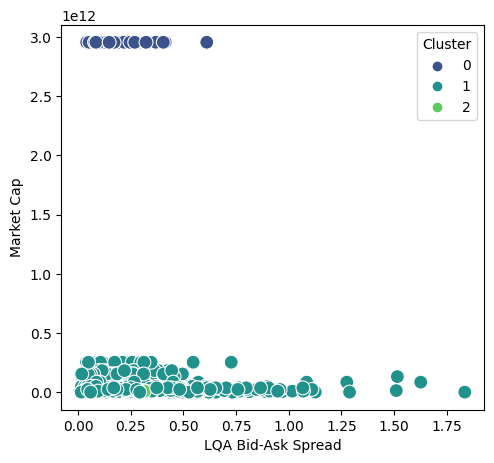

In [77]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.scatterplot(x='LQA Bid-Ask Spread', y='Market Cap', hue='Cluster', data=final_df, palette='viridis', s=100, legend='full')

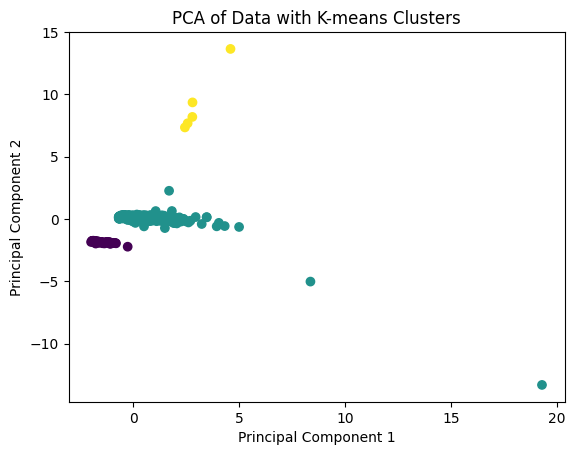

In [78]:
# PCA

from sklearn.decomposition import PCA

cluster_labels = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title("PCA of Data with K-means Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()